In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.1


In [2]:
path = "./tabular-playground-feb21/"
!ls $path

'Complete solution.ipynb'   sample_submission.csv   test.csv   train.csv


### Load data

In [3]:
# 1 point 
 #load the train, test and sample_submission data using the is as the index column
df = pd.read_csv(path+"train.csv")
df.set_index('id', inplace=True)
df_t = pd.read_csv(path+"test.csv")
df_t.set_index('id', inplace=True)
sub = pd.read_csv(path+"sample_submission.csv")
sub.set_index('id', inplace=True)
# YOUR CODE HERE


print("Train dataframe:", df.shape)
print("Test dataframe:", df_t.shape)
df.head()

Train dataframe: (300000, 25)
Test dataframe: (200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
print(sub.shape)
assert df.shape == (300000,25) 
assert df_t.shape == (200000,24) 
assert sub.shape == (200000,1) 

(200000, 1)


### Subsample the data

In [5]:
#1 point
# get a random sample of size 50k, tested with random state 0
dfs = df.sample(50000, random_state=0)
# YOUR CODE HERE

In [6]:
assert dfs.shape == (50000,25)

### There are no missings in this dataset

In [7]:
df.isna().sum().sum(), df_t.isna().sum().sum()

(0, 0)

In [8]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

### Define variables for x and y

In [9]:
cat_vars = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_vars = ['cont0', 'cont1', 'cont2', 'cont3',  'cont4',  'cont5',  'cont6',
            'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# 1 point 
# store in X all the categorical and numerical columns
# store in Y the target

x = dfs.drop(['target'], axis=1)
y = dfs['target']
# YOUR CODE HERE


In [10]:
assert x.shape == (50000,24)
assert y.shape == (50000,)

### See the target variable ([The metric is RMSE](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview/evaluation))

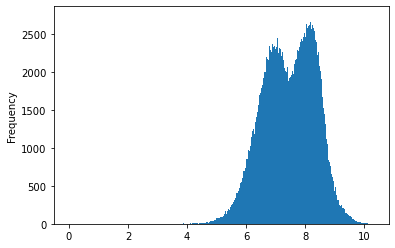

In [11]:
df.target.plot.hist(bins=500);

### See the numerical variables

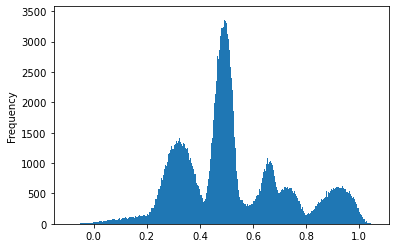

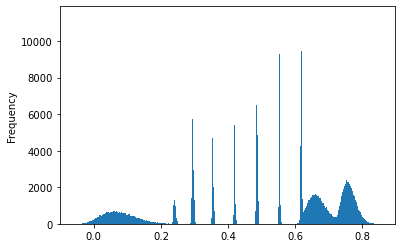

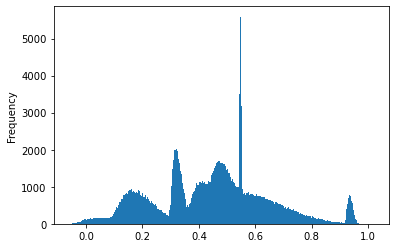

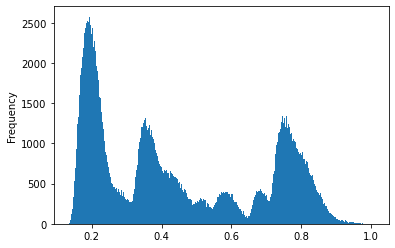

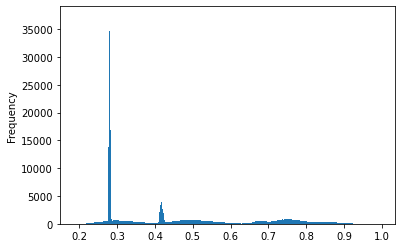

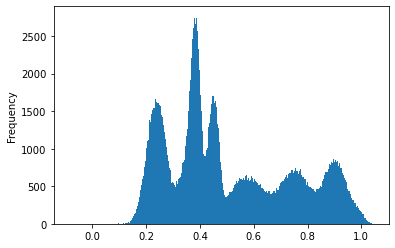

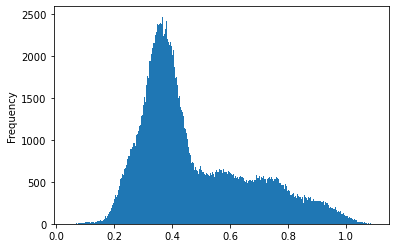

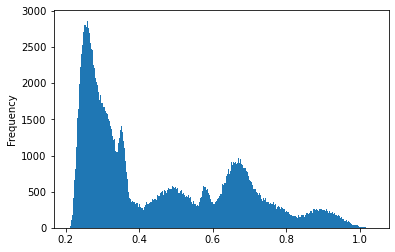

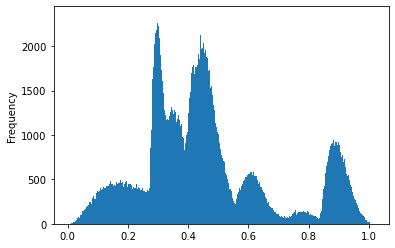

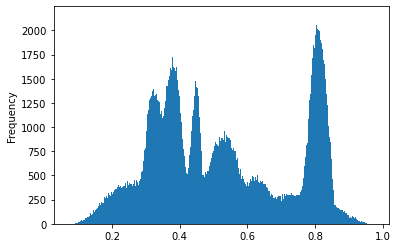

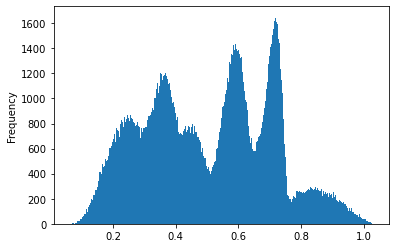

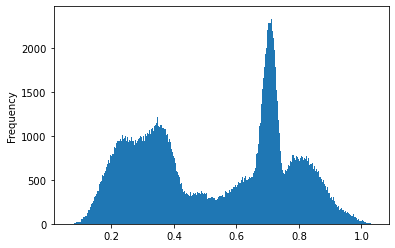

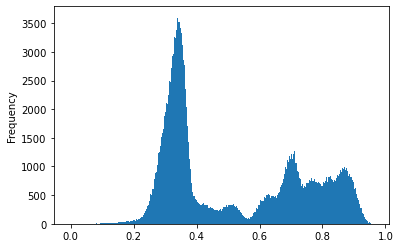

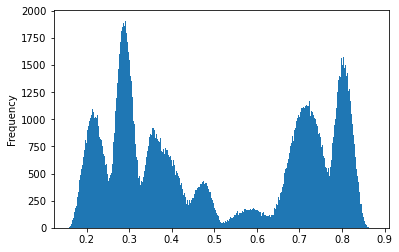

In [12]:
for var in num_vars:
    df[var].plot.hist(bins=500)
    plt.show();

### See the categorical variables (ypu can use `bar()`, `barh()` or `.pie()`)

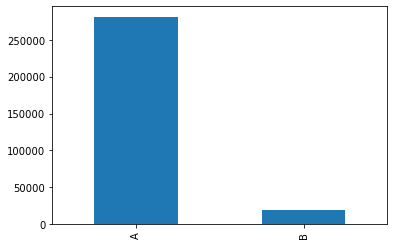

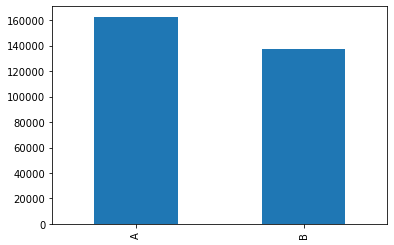

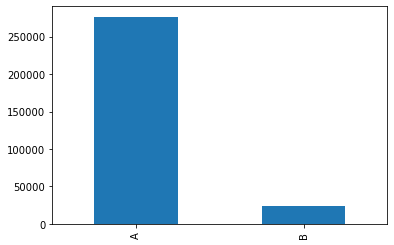

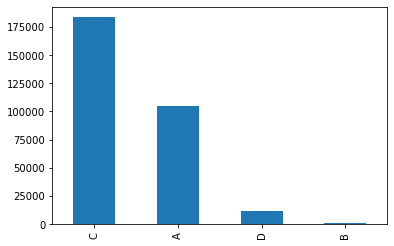

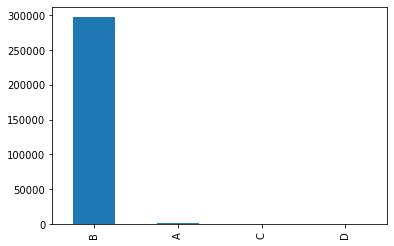

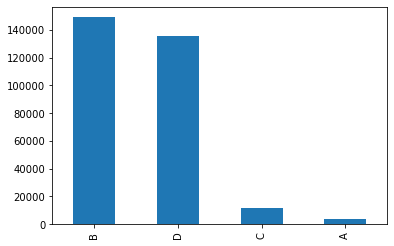

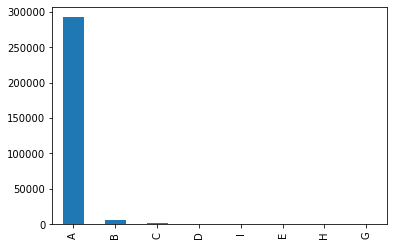

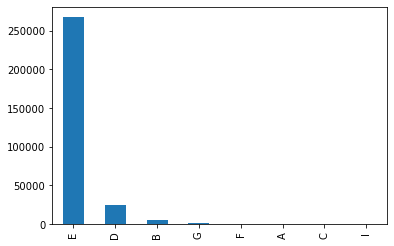

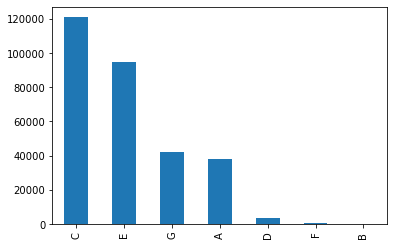

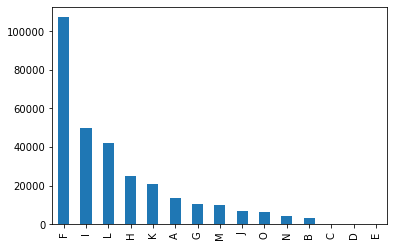

In [13]:
for var in cat_vars:
    df[var].value_counts().plot.bar()
    #df[var].value_counts().plot.barh()
    #df[var].value_counts().plot.pie()
    plt.show();

# Exercise 1 (2 pts)

Create the `ColumTransformer` for **models based on multiplications and distances**:
- Pipeline for numerical variables (`num_vars`): `Standardscaler()` or `QuantileTransformer(n_quantiles=100, output_distribution='normal')`
- Pipeline for categorical variables (`cat_vars`): `OneHotEncoder(handle_unknown='ignore')`

In [14]:
# YOUR CODE HERE
mult_num_var = pipeline.Pipeline(steps=[
    ('STANDARDSCALER',  preprocessing.StandardScaler()),
    ])

mult_cat_var = pipeline.Pipeline(steps=[
    ('ONEHOTENCODER', preprocessing.OneHotEncoder(handle_unknown='ignore'))
    ])

mult_prepro = compose.ColumnTransformer(transformers=[
    ("MULT_NUM_VAR", mult_num_var, num_vars),
    ("MULT_CAT_VAR", mult_cat_var, cat_vars),
    ], remainder='passthrough')

In [18]:
assert type(tree_prepro) is sklearn.compose._column_transformer.ColumnTransformer

# Exercise 2 (2 pts)

Create the `ColumTransformer` for **models based on trees**:
- Pipeline for numerical variables (`num_vars`): **Do nothing**. Tip: You can use `remainder='passthrough'` when you create the `ColumTransformer`.
- Pipeline for categorical variables (`cat_vars`): `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)[source]`

In [17]:
# tree_num_var = pipeline.Pipeline(steps=[
#     ], remainder='passthrough')

tree_cat_var = pipeline.Pipeline(steps=[
    ('ONEHOTENCODER', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ])

tree_prepro = compose.ColumnTransformer(transformers=[
    #("TREE_NUM_VAR", tree_num_var, num_vars),
    ("TREE_CAT_VAR", tree_cat_var, cat_vars),
    ], remainder='passthrough')


In [16]:
assert type(mult_prepro) is sklearn.compose._column_transformer.ColumnTransformer

## Exercise 3 (2pts)
Reasearch about som models and its hyperparamters

In [19]:

from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import ExtraTreesRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm            import SVR
from sklearn.linear_model   import Ridge, Lasso, SGDRegressor, BayesianRidge
from sklearn.neighbors      import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.experimental   import enable_hist_gradient_boosting 
from sklearn.ensemble       import HistGradientBoostingRegressor
from catboost               import CatBoostRegressor
from lightgbm               import LGBMRegressor
tree_classifiers = {
    "Decision_tree_regressor": DecisionTreeRegressor(),
    "AdaBoost_regressor": AdaBoostRegressor(),
    "Extra_trees_regressor": ExtraTreesRegressor(),
    #"Random_forest_regressor": RandomForestRegressor(), # Takes 55 seconds
    #"GBM_regressor": GradientBoostingRegressor(), Takes forever
    "HGB_regressor": HistGradientBoostingRegressor(),
    "CATBoost_regressor": CatBoostRegressor(verbose=0),
    "lightgbm_regressor": LGBMRegressor(),
        }

mult_classifiers = {
    #"Linear_regression": LinearRegression(), ### Dont use results were awful
    "Ridge_regressor": Ridge(),
    #"SVM_regressor": SVR(), # Takes 150  seconds
    "MLP_regressor": MLPRegressor(),
    "SGD_regressor": SGDRegressor(),
    "KNN_regressor": KNeighborsRegressor(),
    "BR_regressor" : BayesianRidge(),
    #"RNN_regressor": RadiusNeighborsRegressor(), # Predicts NaN's :S
    
        }
tree_pipes = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
mult_pipes = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}
all_pipelines = {**tree_pipes,**mult_pipes}
print(len(all_pipelines))

11


In [21]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():
    print(f"Working on {name}....")
    start_time = time.time()
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_valid)
    total_time = time.time() - start_time

    results = results.append({"Model": name,
                              "MSE":   metrics.mean_squared_error(y_valid, preds, squared=True),
                              "RMSE":  metrics.mean_squared_error(y_valid, preds, squared=False),
                              "Time":  total_time},
                              ignore_index=True)
    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))
print("Finished")

,Model,MSE,RMSE,Time
1,lightgbm_regressor,0.724787,0.851344,0.611339
2,HGB_regressor,0.725411,0.851711,1.150980
3,CATBoost_regressor,0.728015,0.853238,5.755068
4,BR_regressor,0.739746,0.860085,0.246082
5,Ridge_regressor,0.739838,0.860139,0.229857
6,SGD_regressor,0.747233,0.864426,0.293533
7,Extra_trees_regressor,0.749978,0.866013,18.075851
8,AdaBoost_regressor,0.763178,0.873601,3.676517
9,MLP_regressor,0.818246,0.904570,27.790927
10,KNN_regressor,0.890417,0.943619,10.653461


Finished


In [22]:
assert results_ord['MSE'].max() < 2
assert results_ord['MSE'].min() < 0.8
assert results_ord['RMSE'].max() < 1.5
assert results_ord['RMSE'].min() < 0.9

### Optional Exercise (optional because it takes a lot of time of computation)
Train with a more realable validation data the best models (maybe the best 5 models). You can:
- Use all training data (without subsample)
- Use Crosvalidation (`KFold`)(using 3, 5 or 7 folds) instead of `train_test_split`

In [23]:
best_five = list(results_ord['Model'].head(5))

b5_pipelines ={}
# from the best 5 models, create new pipelines to iterate through
for m in best_five:
    if m in tree_classifiers.keys():
        b5_pipelines[m] = pipeline.make_pipeline(tree_prepro, tree_classifiers[m])
    elif m in mult_classifiers.keys():
        b5_pipelines[m] = pipeline.make_pipeline(mult_prepro, mult_classifiers[m])
    else:
        print("Can't find model")
print(len(b5_pipelines))


### Split the data the whole dataset
adf = pd.read_csv(path+"train.csv", index_col="id")
print("Using all data with", len(adf), "rows")
xx = adf[cat_vars+num_vars]
yy = adf["target"]
xx_train, xx_valid, yy_train, yy_valid = model_selection.train_test_split(xx, yy, test_size=0.3, random_state=0)

b5_results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in b5_pipelines.items():
    print(f"Working on {name}....")
    start_time = time.time()
    pipe.fit(xx_train, yy_train)
    preds = pipe.predict(xx_valid)
    total_time = time.time() - start_time

    b5_results = b5_results.append({"Model": name,
                              "MSE":   metrics.mean_squared_error(yy_valid, preds, squared=True),
                              "RMSE":  metrics.mean_squared_error(yy_valid, preds, squared=False),
                              "Time":  total_time},
                              ignore_index=True)
    
    b5_results_ord = b5_results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    b5_results_ord.index += 1 
    clear_output()
    display(b5_results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))
print("Finished")

,Model,MSE,RMSE,Time
1,CATBoost_regressor,0.713957,0.844960,24.480187
2,HGB_regressor,0.717395,0.846992,6.358797
3,lightgbm_regressor,0.717631,0.847131,3.999641
4,BR_regressor,0.745627,0.863497,1.692759
5,Ridge_regressor,0.745773,0.863581,0.922369


Finished


In [24]:
# IMPLEMENT SOMETHING SIMILAR TO THE PROCESS BEFORE
# BUT USE KFOLD
print("Starting")
cvb5_results = pd.DataFrame({'Model': [],"AVG_MSE": [], "AVG_RMSE": [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in b5_pipelines.items():
    #if name != "GBM_regressor" and name != "CATBoost_regressor":
    print(f"Working on {name}....")
    start_time = time.time()
    cv_results = model_selection.cross_validate(pipe, xx, yy, cv=5,
                                               scoring=("neg_mean_squared_error","neg_root_mean_squared_error"))
    total_time = time.time() - start_time


    cvb5_results = cvb5_results.append({"Model": name,
                              "AVG_MSE": np.mean(cv_results['test_neg_mean_squared_error']),
                              "AVG_RMSE": np.mean(cv_results['test_neg_root_mean_squared_error']),
                              "MSE":   cv_results['test_neg_mean_squared_error'],
                              "RMSE":  cv_results['test_neg_root_mean_squared_error'],
                              "Time":  total_time},
                              ignore_index=True)
    
    cvb5_results_ord = cvb5_results.sort_values(by=['AVG_RMSE'], ascending=True, ignore_index=True)
    cvb5_results_ord.index += 1 
    clear_output()
    display(cvb5_results_ord)
    #display(cvb5_results_ord.style.bar(subset=["AVG_MSE", 'AVG_MSE'], vmin=0, color='#5fba7d'))

print("Finished")

,Model,AVG_MSE,AVG_RMSE,MSE,RMSE,Time
1,Ridge_regressor,-0.746055,-0.863744,"[-0.7440118181637095, -0.7472794464034761, -0....","[-0.8625611967644438, -0.864453264441448, -0.8...",5.950717
2,BR_regressor,-0.746022,-0.863725,"[-0.7439319125777325, -0.7471801099232817, -0....","[-0.8625148767283568, -0.8643958062851078, -0....",10.728364
3,HGB_regressor,-0.716765,-0.846619,"[-0.7157074602663974, -0.7163248654011767, -0....","[-0.8459949528610661, -0.8463597730286906, -0....",28.872987
4,lightgbm_regressor,-0.716455,-0.846436,"[-0.7154245852091442, -0.715933414076851, -0.7...","[-0.8458277515009449, -0.8461284855604679, -0....",20.784494
5,CATBoost_regressor,-0.712277,-0.843965,"[-0.7121366125354038, -0.7114135461043515, -0....","[-0.8438818711972689, -0.8434533455410272, -0....",198.822494


Finished


# Find correct hyper parameters for the best model

In [25]:
CBR_params = {
    "catboostregressor__learning_rate": [0.1, 0.01, 0.001, 0.0001]
}
#{'catboostregressor__learning_rate': 0.01}
pl = pipeline.make_pipeline(tree_prepro, CatBoostRegressor(verbose=0))
grid_search = model_selection.GridSearchCV(pl, param_grid=CBR_params)
# fit with sample data first (x, y)
grid_score = grid_search.fit(x,y)

print(grid_score.best_params_)

{'catboostregressor__learning_rate': 0.01}


In [26]:

catboost_df = pd.DataFrame({'Model': [],"AVG_MSE": [], "AVG_RMSE": [], 'MSE': [], 'RMSE': [], 'Time': []})
cbr_pl = pipeline.make_pipeline(tree_prepro, CatBoostRegressor(verbose=0, learning_rate=0.01))
start_time = time.time()
cv_results = model_selection.cross_validate(cbr_pl, xx, yy, cv=10,
                                           scoring=("neg_mean_squared_error","neg_root_mean_squared_error"))
total_time = time.time() - start_time


catboost_df = catboost_df.append({"Model": name,
                          "AVG_MSE": np.mean(cv_results['test_neg_mean_squared_error']),
                          "AVG_RMSE": np.mean(cv_results['test_neg_root_mean_squared_error']),
                          "MSE":   cv_results['test_neg_mean_squared_error'],
                          "RMSE":  cv_results['test_neg_root_mean_squared_error'],
                          "Time":  total_time},
                          ignore_index=True)

display(catboost_df)


,Model,AVG_MSE,AVG_RMSE,MSE,RMSE,Time
0,Ridge_regressor,-0.723866,-0.850798,"[-0.7149791518519274, -0.7297408781589994, -0....","[-0.8455643984061341, -0.8542487214851417, -0....",331.56542


In [27]:
cbr_pl.fit(xx, yy)
print("Fit done")


Fit done


In [28]:
predictions = cbr_pl.predict(df_t)


In [35]:
df_t['target'] = predictions


   cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
id                                                    ...                       
0     A    B    A    C    B    D    A    E    E    G  ...  0.595507  0.286912   
5     A    B    A    C    B    D    A    E    C    L  ...  0.479552  0.397436   
15    A    B    A    C    B    D    A    E    C    F  ...  0.676395  0.695284   
16    A    A    B    A    B    D    A    E    E    F  ...  0.759875  0.240049   
17    A    B    A    A    B    B    A    E    E    I  ...  0.210232  0.329851   

       cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id                                                                         
0   0.279884  0.202234  0.242654  0.285147  0.264308  0.653654  0.302448   
5   0.476742  0.857073  0.516393  0.562065  0.730542  0.318492  0.736251   
15  0.253316  0.586934  0.548555  0.836193  0.759788  0.333572  0.273905   
16  0.298074  0.442475  0.596746  0.414131  0.255382

In [37]:

submission = df_t['target']

submission.to_csv('result_checks.csv')
print(submission.head())

id
0     7.522474
5     7.818788
15    7.635243
16    7.440087
17    7.353162
Name: target, dtype: float64
